In [1]:
# import newly developed scripts
import sys
sys.path.append('/Users/nweir/Dropbox/code/csth-imaging')
from csth_analysis import czi_io, find_cells, segment_cells
import numpy as np
import os
from skimage import io, measure
from scipy.ndimage import filters
import matplotlib.pyplot as plt
from scipy import stats
import pickle
from skimage.feature import canny
from pyto_segmenter import PexSegment
from scipy.ndimage.morphology import distance_transform_edt
from skimage.morphology import watershed
%matplotlib inline

/usr/local/lib/python3.6/site-packages/tifffile.py:313: UserWarning: ImportError: No module named '_tifffile'. Loading of some compressed images will be very slow. Tifffile.c can be obtained at http://www.lfd.uci.edu/~gohlke/
  "ImportError: No module named '_tifffile'. "
/usr/local/lib/python3.6/site-packages/czifile.py:130: UserWarning: failed to import the optional _czifile C extension module.
Decoding of JXR and JPEG encoded images will not be available.
Czifile.pyx can be obtained at http://www.lfd.uci.edu/~gohlke/
  "failed to import the optional _czifile C extension module.\n"
/usr/local/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


This seems to import the image fine. I need to get a sample background image too, then I'll try to find cells using this.

In [2]:
os.chdir('/Users/nweir/Dropbox/chris_imaging/imaging_test/th_sample_czi/')
test_finder = find_cells.MultiFinder('/Users/nweir/Dropbox/chris_imaging/imaging_test/th_sample_czi/LC3-p62_HEK_WT_Torin_ClumpsandSingles_Airyscan Processing.czi',
                                    bg_filename = '/Users/nweir/Dropbox/chris_imaging/imaging_test/th_sample_czi/LC3-p62_HEK_dVPS37A_No Torin_EMPTY_AiryscanProcessing.czi')

In [3]:
splitter = segment_cells.CellSplitter(test_finder)

In [4]:
splitter.segment_nuclei()

input image has 4 dimensions (multiple imgs)
segmenting image #1 of 5...
raw image imported.
performing gaussian filtering...
Image smoothed.
preprocessing complete.
thresholding...
mode = threshold.
thresholding complete.
filling holes in objects.
generating distance map...
distance map complete.
smoothing distance map...
distance map smoothed.
identifying maxima...
maxima identified.
watershedding...
watershedding complete.
creating PexSegmentObj...
passing segmented objs and seeds to Nuclei instance...

segmenting image #2 of 5...
raw image imported.
performing gaussian filtering...
Image smoothed.
preprocessing complete.
thresholding...
mode = threshold.
thresholding complete.
filling holes in objects.
generating distance map...
distance map complete.
smoothing distance map...
distance map smoothed.
identifying maxima...
maxima identified.
watershedding...
watershedding complete.
creating PexSegmentObj...
passing segmented objs and seeds to Nuclei instance...

segmenting image #3 o

In [5]:
for i in range(0,len(splitter.segmented_nuclei)):
    io.imsave('splitter_output_' + str(i) +'.tif', splitter.segmented_nuclei[i])

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: splitter_output_0.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: splitter_output_1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: splitter_output_2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: splitter_output_3.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: splitter_output_4.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


In [7]:
nucleus_imgs = splitter.multi_finder.get_channel_arrays(405)[0]

In [5]:
test_nuc_img = nucleus_imgs[0,:,:,:]

In [6]:
gaussian_test = filters.gaussian_filter(test_nuc_img,[1,2,2])

In [28]:
io.imsave('test_gaussian_2.tif',gaussian_test)

In [35]:
nuc_segmenter = PexSegment.PexSegmenter(
    src_data=nucleus_imgs[2,:,:,:], threshold=4000, g_xy=2, g_z=1)
segmented_nuclei = nuc_segmenter.segment(fill_holes=True,
                                         edt_sampling = (10,1,1), edt_smooth=[3,50,50])

raw image imported.
performing gaussian filtering...
Image smoothed.
preprocessing complete.
thresholding...
mode = threshold.
thresholding complete.
filling holes in objects.
generating distance map...
distance map complete.
smoothing distance map...
distance map smoothed.
identifying maxima...
maxima identified.
watershedding...
watershedding complete.
filtering out too-large and too-small objects...
creating PexSegmentObj...


In [36]:
io.imsave('nuclei_test.tif', segmented_nuclei.peroxisomes)

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: nuclei_test.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


In [37]:
io.imsave('threshold_test.tif', segmented_nuclei.threshold_img)

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: threshold_test.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


In [38]:
io.imsave('dist_map.tif', segmented_nuclei.dist_map)
io.imsave('smooth_dist_map.tif', segmented_nuclei.smooth_dist_map)

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: dist_map.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: smooth_dist_map.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


In [24]:
labs = PexSegment.PexSegmenter.watershed_labels(segmented_nuclei.maxima)

In [25]:
np.nonzero(labs)

(array([ 0,  1, 11]), array([674, 448, 553]), array([755, 380, 548]))

In [ ]:
nuclei = watershed(-segmented_nuclei.smooth_dist_map, labs, mask=)

## Moving onto segmenting cells

In [4]:
splitter.segment_cells(488)

checking that nuclei have already been segmented...
nuclei have not been segmented yet.
segmenting nuclei...
input image has 4 dimensions (multiple imgs)
segmenting image #1 of 5...
raw image imported.
performing gaussian filtering...
Image smoothed.
preprocessing complete.
thresholding...
mode = threshold.
thresholding complete.
filling holes in objects.
generating distance map...
distance map complete.
smoothing distance map...
distance map smoothed.
identifying maxima...
maxima identified.
watershedding...
watershedding complete.
creating PexSegmentObj...
passing segmented objs and seeds to Nuclei instance...

segmenting image #2 of 5...
raw image imported.
performing gaussian filtering...
Image smoothed.
preprocessing complete.
thresholding...
mode = threshold.
thresholding complete.
filling holes in objects.
generating distance map...
distance map complete.
smoothing distance map...
distance map smoothed.
identifying maxima...
maxima identified.
watershedding...
watershedding comp

In [7]:
for i in range(0, len(splitter.segmented_cells)):
    io.imsave('segmented_cells_' + str(i) + '.tif', splitter.segmented_cells[i])

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: segmented_cells_0.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: segmented_cells_1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: segmented_cells_2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: segmented_cells_3.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: segmented_cells_4.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


This didn't separate cells - it called each object as one large cell. I need to look at the watershedding intermediates (e.g. the dist xform) to see what went wrong.

In [24]:
nuclei_masks = splitter.segmented_nuclei
for i in range (0, len(nuclei_masks)):
    nuclei_masks[i][nuclei_masks[i]>0] = 1
    nuclei_masks[i]=np.invert(nuclei_masks[i].astype('bool'))
    

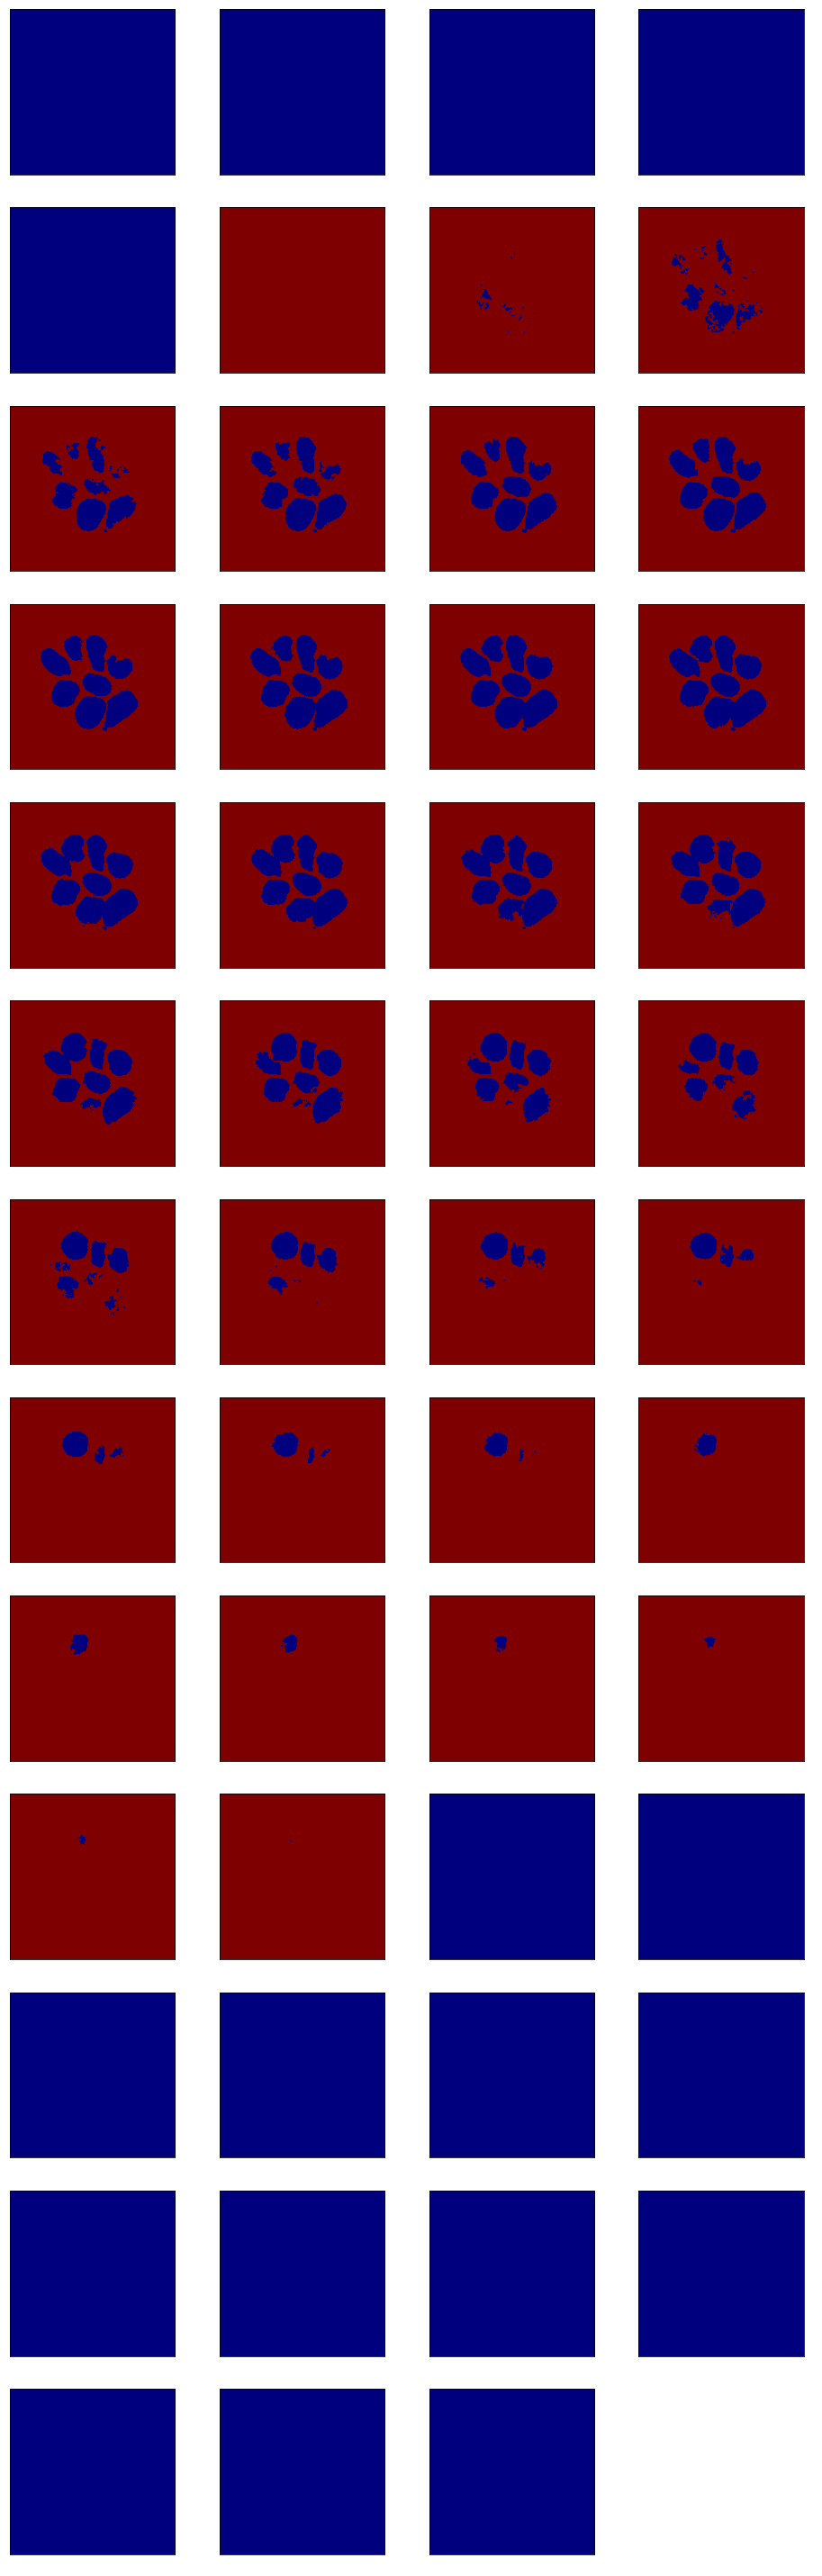

In [25]:
PexSegment.PexSegmentObj.plot_stack(nuclei_masks[0])

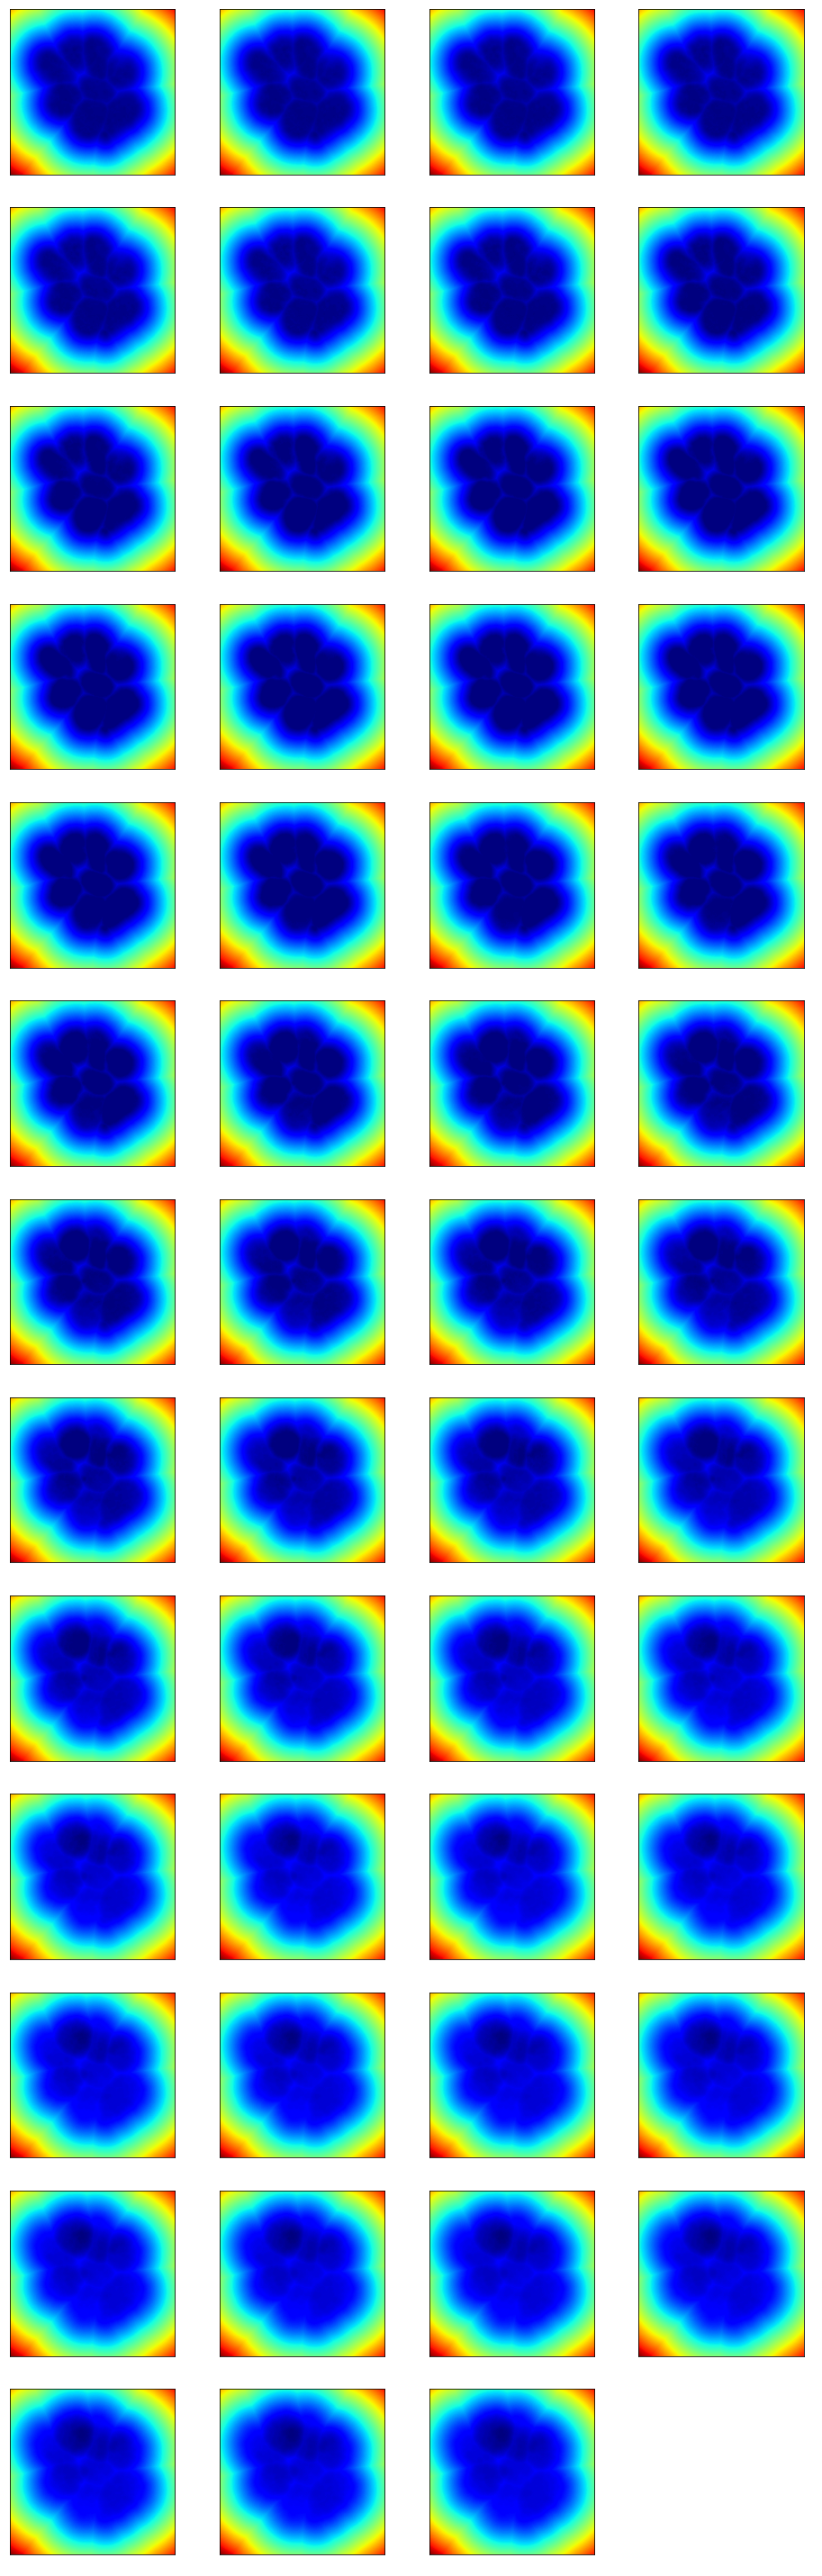

In [27]:
# do distance map for one nucleus object and visualize

dist_map = distance_transform_edt(nuclei_masks[0], sampling=(3,1,1))
PexSegment.PexSegmentObj.plot_stack(dist_map)

In [30]:
dist_map = filters.gaussian_filter(dist_map, [1,2,2])
labs = PexSegment.PexSegmenter.watershed_labels(splitter.nuclei_centers[0])
segmented_cells = watershed(dist_map, labs, mask=splitter.cell_masks[0])

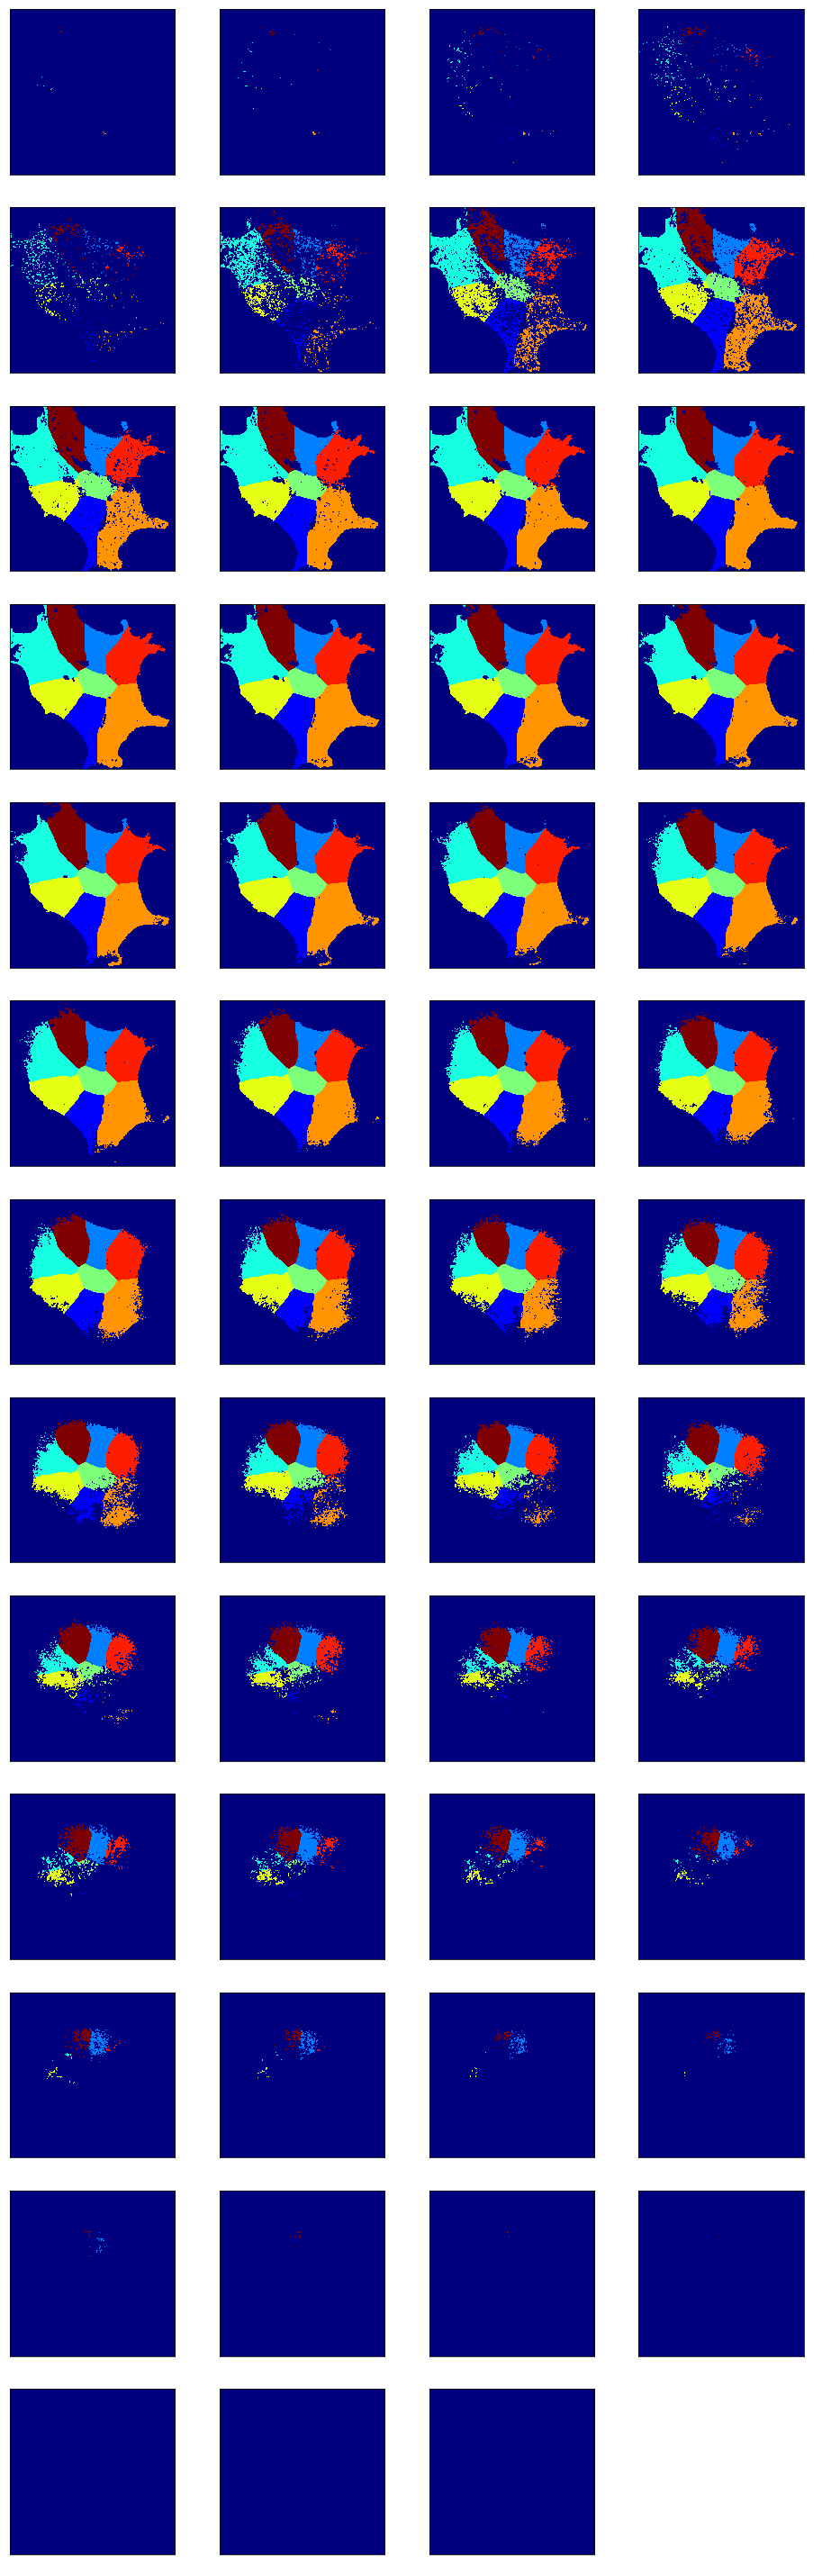

In [31]:
PexSegment.PexSegmentObj.plot_stack(segmented_cells)

This is all set. Moving onto segmenting foci.

## Segmenting foci and assigning to cells

In [58]:
gfp_ims = splitter.multi_finder.get_channel_arrays(488, bg=False)
gfp_ims = gfp_ims[0]
segmentation_test = PexSegment.PexSegmenter(src_data=gfp_ims[0,:,:,:],
                                           seg_method='canny', high_threshold=12500,
                                           low_threshold=6250)
segmentation_test = segmentation_test.segment()
os.system('say "Done"')

raw image imported.
performing gaussian filtering...
Image smoothed.
preprocessing complete.
generating distance map...
distance map complete.
smoothing distance map...
distance map smoothed.
identifying maxima...
maxima identified.
watershedding...
watershedding complete.
creating PexSegmentObj...


0

In [59]:
io.imsave('sample_segmentation.tif', segmentation_test.peroxisomes)
io.imsave('raw_img.tif', segmentation_test.raw_img)

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: sample_segmentation.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: raw_img.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


In [40]:
# next, compare intensities of segmented objects to bgrd
output_intensities = {}
for obj in np.unique(segmentation_test.peroxisomes):
    if obj == 0:
        continue
    output_intensities[obj] = np.sum(segmentation_test.raw_img[segmentation_test.peroxisomes == obj]).astype('float')/np.sum(segmentation_test.peroxisomes == obj)

In [41]:
output_intensities

{1: 12633.294392523365,
 2: 6291.2363636363634,
 3: 7020.5925925925922,
 4: 3496.8000000000002,
 5: 8532.2272727272721,
 6: 7376.2068965517237,
 7: 7324.4482758620688,
 8: 7573.7738095238092,
 9: 6102.090909090909,
 10: 8138.3431734317346,
 11: 6836.8275862068967,
 12: 7190.4692982456145,
 13: 8441.9784946236559,
 14: 11949.196319018405,
 15: 11793.033519553073,
 16: 7242.4750000000004,
 17: 7594.4158415841584,
 18: 5823.8125,
 19: 11447.571428571429,
 20: 6459.411764705882,
 21: 6471.9480519480521,
 22: 6039.2564102564102,
 23: 9880.3098591549297,
 24: 6575.0,
 26: 8906.8142857142866,
 27: 9940.121052631579,
 28: 5504.45652173913,
 29: 11051.335999999999,
 30: 7438.625,
 31: 7394.125,
 32: 9538.4950495049507,
 33: 7726.5897435897432,
 34: 6597.7845303867407,
 35: 7266.8157894736842,
 36: 7546.3157894736842,
 37: 7780.5289256198348,
 38: 5904.2380952380954,
 39: 6330.9607843137255,
 40: 6498.9466666666667,
 41: 9642.6352459016398,
 42: 9539.9160839160832,
 43: 8994.7192982456145,
 44: 

(array([  2.,   0.,   1.,   3.,   8.,   7.,  11.,  23.,  33.,  21.,  29.,
         17.,  18.,  11.,  10.,  11.,  11.,   7.,   3.,   9.,   5.,   5.,
          4.,   3.,   4.,   4.,   3.,   2.,   2.,   1.,   1.,   2.,   1.,
          1.,   2.,   1.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   1.]),
 array([  3496.8       ,   3855.21951929,   4213.63903858,   4572.05855786,
          4930.47807715,   5288.89759644,   5647.31711573,   6005.73663501,
          6364.1561543 ,   6722.57567359,   7080.99519288,   7439.41471217,
          7797.83423145,   8156.25375074,   8514.67327003,   8873.09278932,
          9231.51230861,   9589.93182789,   9948.35134718,  10306.77086647,
         10665.19038576,  11023.60990504,  11382.02942433,  11740.44894362,
         12098.86846291,  12457.2879822 ,  12815.70750148,  13174.12702077,
         13532.54654006,  13890.96605935,  14249.38557864,  14607.80509792,
         14966.22461721,  15324.6441365 ,  15683.0

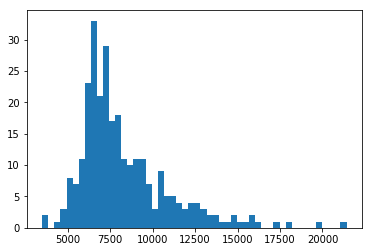

In [44]:
plt.hist([v for v in output_intensities.values()], bins=50)

In [45]:
np.mean(segmentation_test.raw_img[splitter.cell_masks[0]])

815.33054918375524

In [46]:
np.std(segmentation_test.raw_img[splitter.cell_masks[0]])

924.15928874043334

None of these objects fall anywhere near the mean of the cell pixels in terms of mean intensity. What are the dim ones? Are they things I want?

In [50]:
rev_intensities = {v:k for k, v in output_intensities.items()}
low_int_only = np.copy(segmentation_test.peroxisomes)
for i in rev_intensities.keys():
    if i > 6000:
        low_int_only[low_int_only == rev_intensities[i]] = 0

In [51]:
io.imsave('low_int_foci.tif', low_int_only)

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: low_int_foci.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


Moving on to the other channel.

(5, 3, 51, 1112, 1112)

In [60]:
gfp_ims = splitter.multi_finder.get_channel_arrays(561, bg=False)
gfp_ims = gfp_ims[0]
segmentation_test = PexSegment.PexSegmenter(src_data=gfp_ims[0,:,:,:],
                                           seg_method='canny', high_threshold=12500,
                                           low_threshold=6250)
segmentation_test = segmentation_test.segment()
os.system('say "Done"')

raw image imported.
performing gaussian filtering...
Image smoothed.
preprocessing complete.
generating distance map...
distance map complete.
smoothing distance map...
distance map smoothed.
identifying maxima...
maxima identified.
watershedding...
watershedding complete.
creating PexSegmentObj...


0

In [61]:
io.imsave('sample_segmentation.tif', segmentation_test.peroxisomes)
io.imsave('raw_img.tif', segmentation_test.raw_img)

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: sample_segmentation.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: raw_img.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


In [62]:
# next, compare intensities of segmented objects to bgrd
output_intensities = {}
for obj in np.unique(segmentation_test.peroxisomes):
    if obj == 0:
        continue
    output_intensities[obj] = np.sum(segmentation_test.raw_img[segmentation_test.peroxisomes == obj]).astype('float')/np.sum(segmentation_test.peroxisomes == obj)

(array([  1.,   1.,   0.,   2.,   2.,   3.,   6.,  13.,  22.,  28.,  39.,
         49.,  46.,  47.,  40.,  29.,  30.,  33.,  28.,  20.,  19.,  17.,
         10.,   9.,  12.,   7.,   7.,   9.,   2.,   7.,   3.,   2.,   3.,
          3.,   2.,   0.,   1.,   1.,   2.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.]),
 array([  2944.66666667,   3286.51141026,   3628.35615385,   3970.20089744,
          4312.04564103,   4653.89038462,   4995.73512821,   5337.57987179,
          5679.42461538,   6021.26935897,   6363.11410256,   6704.95884615,
          7046.80358974,   7388.64833333,   7730.49307692,   8072.33782051,
          8414.1825641 ,   8756.02730769,   9097.87205128,   9439.71679487,
          9781.56153846,  10123.40628205,  10465.25102564,  10807.09576923,
         11148.94051282,  11490.78525641,  11832.63      ,  12174.47474359,
         12516.31948718,  12858.16423077,  13200.00897436,  13541.85371795,
         13883.69846154,  14225.54320513,  14567.3

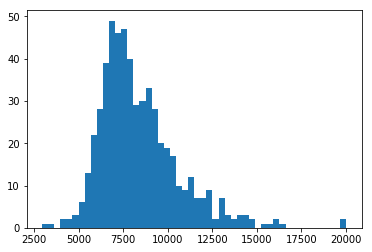

In [63]:
plt.hist([v for v in output_intensities.values()], bins=50)

In [64]:
np.mean(segmentation_test.raw_img[splitter.cell_masks[0]])

921.20869350773251

In [65]:
np.std(segmentation_test.raw_img[splitter.cell_masks[0]])

1155.1267258575606

## old stuff from segmenting cells

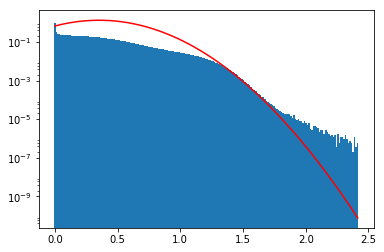

In [21]:
im_arrs = test_finder.get_channel_arrays(488)
log_f_im = np.log10(im_arrs[0]+1)
log_bg_im = np.log10(im_arrs[1]+1)
log_gaussian_f = filters.gaussian_filter(log_f_im, sigma=[0,0,3,3])
log_gaussian_bg = filters.gaussian_filter(log_bg_im, sigma=[0,0,3,3])
log_bg_mean = np.mean(log_gaussian_bg)
log_bg_sd = np.std(log_gaussian_bg)
n, bins= np.histogram(log_gaussian_bg, 200)
n = n/np.amax(n)
plt.bar(bins[:-1],n,width = bins[1]-bins[0])
norm_pdf = stats.norm.pdf(bins[:-1], log_bg_mean, log_bg_sd)
plt.plot(bins[:-1], norm_pdf, color = 'red')
plt.yscale('log', nonposy='clip')

plt.show()

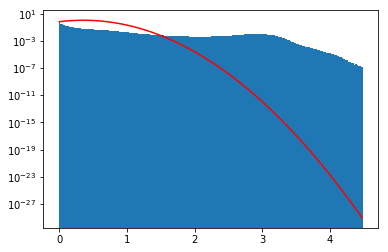

In [16]:
n, bins= np.histogram(log_gaussian_f, 200)
n = n/np.amax(n)
plt.bar(bins[:-1],n,width = bins[1]-bins[0])
norm_pdf = stats.norm.pdf(bins[:-1], log_bg_mean, log_bg_sd)
plt.plot(bins[:-1], norm_pdf, color = 'red')
plt.yscale('log', nonposy='clip')


plt.show()

This is clearly a terrible fit but it _looks_ like it should work for my purposes (all of the dim stuff that likely corresponds to background matches in the two images, whereas there's more bright stuff in the + cells image.

In [22]:
f_pvals = 1-stats.norm.cdf(log_gaussian_f, log_bg_mean, log_bg_sd)
f_pvals = f_pvals*65535 
f_pvals = f_pvals.astype('uint16')

In [23]:
io.imsave('/Users/nweir/Dropbox/chris_imaging/imaging_test/th_sample_czi/pvals_test.tif', f_pvals)

In [58]:
f_pvals_binary = np.copy(f_pvals)
f_pvals_binary[f_pvals > 0] = 0
f_pvals_binary[f_pvals == 0] = 1

In [59]:
io.imsave('/Users/nweir/Dropbox/chris_imaging/imaging_test/th_sample_czi/binary_pvals_test.tif', f_pvals_binary)

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/nweir/Dropbox/chris_imaging/imaging_test/th_sample_czi/binary_pvals_test.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


In [74]:
curr_im = f_pvals_binary[0, :, :, :]
r_labs = measure.label(curr_im, connectivity=2, background=0)
objs_w_cts = np.unique(r_labs[r_labs != 0], return_counts=True)
cell_mask = np.reshape(np.in1d(
    r_labs, objs_w_cts[0][objs_w_cts[1] > 100000]),
                       r_labs.shape)
trim_labs = np.copy(r_labs)
trim_labs[np.invert(cell_mask)] = 0


In [76]:
io.imsave('/Users/nweir/Dropbox/chris_imaging/imaging_test/th_sample_czi/curr_im_test.tif', curr_im.astype('uint16'))
io.imsave('/Users/nweir/Dropbox/chris_imaging/imaging_test/th_sample_czi/raw_labs_test.tif', r_labs.astype('uint16'))
io.imsave('/Users/nweir/Dropbox/chris_imaging/imaging_test/th_sample_czi/trimmed_labs_test.tif', trim_labs.astype('uint16'))
io.imsave('/Users/nweir/Dropbox/chris_imaging/imaging_test/th_sample_czi/cell_mask_test.tif', cell_mask.astype('uint16'))

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/nweir/Dropbox/chris_imaging/imaging_test/th_sample_czi/curr_im_test.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/nweir/Dropbox/chris_imaging/imaging_test/th_sample_czi/raw_labs_test.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/nweir/Dropbox/chris_imaging/imaging_test/th_sample_czi/trimmed_labs_test.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /Users/nweir/Dropbox/chris_imaging/imaging_test/th_sample_czi/cell_mask_test.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


In [70]:
curr_im.shape

(51, 1112, 1112)

In [75]:
objs_w_cts

(array([   1,    2,    3, ..., 1189, 1190, 1191]),
 array([       9, 13584160,        2, ...,        3,        3,       17]))

In [72]:
print(objs_w_cts)

(array([   0,    1,    2, ..., 1189, 1190, 1191]), array([49442110,        9, 13584160, ...,        3,        3,       17]))


In [73]:
objs_w_cts[0][objs_w_cts[1] > 100000]

array([0, 2])